In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [5]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
continuos = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
discrete_catogorical = ['Outcome']
discrete_count = ['Pregnancies']

# Exploratory Data Analysis(**EDA**)

In [8]:
df[continuos].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [9]:
df[continuos].corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


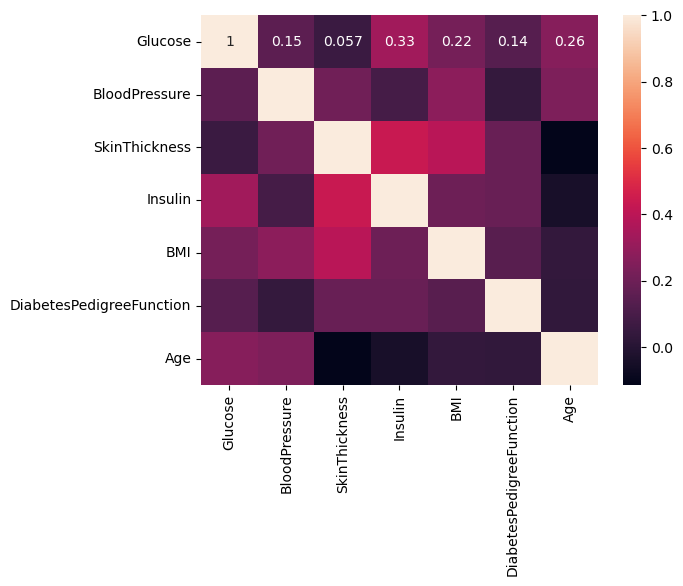

In [10]:
sns.heatmap(df[continuos].corr(),annot=True)
plt.show()

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# Data wrangling no need here

In [14]:
# x & y
x = df.drop(columns="Outcome")  # x = df.drop("Outcome",axis=1)  
y =df["Outcome"] 

In [15]:
train_acc = []
cv = []
test_acc = []

for i in range(0,100):
    
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    model=LogisticRegression()
    model.fit(x_train,y_train)

    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5).mean())
    
    from sklearn.metrics import accuracy_score
    train_acc.append(accuracy_score(y_train,ypred_train))
    test_acc.append(accuracy_score(y_test,ypred_test))
    
em =pd.DataFrame({"train_acc":train_acc,"cv":cv,"test_acc":test_acc})

# for best random state number...just check train == cv or not

gm = em[(abs(em["test_acc"]-em["cv"])<=0.05)]
# it retains rows where the difference between training R-squared and CV R-squared is within 0.05.
# Difference b/w train and cv must be less than 0.05 itself

rs=gm[gm["test_acc"]==gm["test_acc"].max()].index.tolist()[0] 
# filters the rows of the DataFrame gm to include only those rows where "test_acc" equals the maximum "test_acc" value.# 

pd.set_option("display.max_rows",None)
gm

,train_acc,cv,test_acc
1,0.783388,0.770372,0.779221
2,0.776873,0.746048,0.766234
3,0.788274,0.773557,0.740260
4,0.770358,0.760576,0.805195
5,0.785016,0.754125,0.785714
6,0.778502,0.760616,0.779221
7,0.778502,0.778449,0.792208
8,0.775244,0.765480,0.772727
9,0.796417,0.780088,0.766234
10,0.771987,0.768772,0.766234


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=28)

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
print("intercept ",lr.intercept_)
print("co-eficient",lr.coef_)

intercept  [-8.00461447]
co-eficient [[ 1.00511899e-01  3.26648113e-02 -1.12935060e-02 -1.07939840e-03
  -4.98302556e-04  7.94299656e-02  8.05410258e-01  2.27389396e-02]]


# Evaluation

In [19]:
ypred_train = lr.predict(x_train) # ypred_train = lr.predict_proba(x_train) for logistic regression probability values need...for sigmoid curve representation, becoz
ypred_train                            # with regresion line we can touch more points than sigmoid curve


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [20]:
# df=pd.set_option('display.max_rows',None)

In [21]:
ypred_train.shape

(614,)

In [22]:
ypred_train = lr.predict(x_train)
ypred_test = lr.predict(x_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy : ",accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CV Sore : ",cross_val_score(lr,x_train,y_train,cv=5).mean())

from sklearn.metrics import accuracy_score
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))

Train Accuracy :  0.7671009771986971
CV Sore :  0.7638411302145808
Test Accuracy :  0.8116883116883117


In [23]:
""" Train Accuracy :  0.7768729641693811
CV Sore :  0.7492069838731175
Test Accuracy :  0.8181818181818182   """

' Train Accuracy :  0.7768729641693811\nCV Sore :  0.7492069838731175\nTest Accuracy :  0.8181818181818182   '

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[93, 10],
       [19, 32]], dtype=int64)

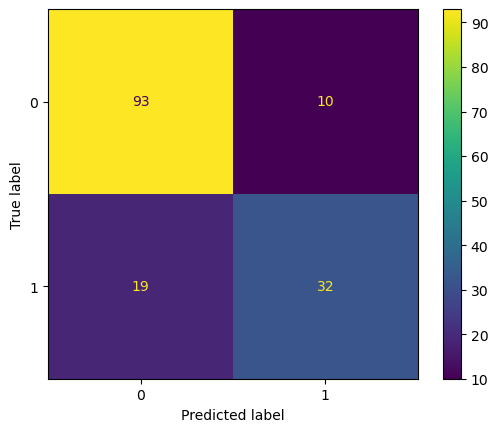

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.76      0.63      0.69        51

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



# Influential records only applied on LINEAR REGRESSION

In [ ]:
import warnings
warnings.simplefilter("ignore")

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd

# Initialize models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "ANN": MLPClassifier(max_iter=1000)  # Artificial Neural Network model
}

# Initialize dictionaries to store evaluation metrics for each model
train_acc = {}
test_acc = {}
cv_score_train = {}
precision_train = {}
recall_train = {}
f1_train = {}
train_acc_imp = {}
test_acc_imp = {}
cv_score_train_imp = {}
precision_train_imp = {}
recall_train_imp = {}
f1_train_imp = {}
best_params = {}
best_random_state = {}

# Variables for PCA results
train_acc_pca = {}
test_acc_pca = {}
cv_score_train_pca = {}
precision_train_pca = {}
recall_train_pca = {}
f1_train_pca = {}

# List of models that require feature scaling
models_needing_scaling = [
    "Logistic Regression", "SVM", "K Neighbors", "ANN"
]

# Iterate over each model for evaluation
for name, model in models.items():
    train_acc_temp = []  # Temporary list for training accuracy
    test_acc_temp = []   # Temporary list for testing accuracy
    cv_temp = []         # Temporary list for cross-validation scores

    # Determine the best random state by iterating through multiple options
    for i in range(0, 100):
        # Split the data into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=i)
        
        # Scale features only if the model requires it
        if name in models_needing_scaling:
            scaler = MinMaxScaler()  # Initialize MinMaxScaler
            x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data
            x_test_scaled = scaler.transform(x_test)        # Transform testing data
        else:
            x_train_scaled, x_test_scaled = x_train, x_test  # No scaling for other models

        # Fit the model on the scaled (or original) training data
        model.fit(x_train_scaled, y_train)

        # Make predictions on training and testing data
        ypred_train = model.predict(x_train_scaled)
        ypred_test = model.predict(x_test_scaled)

        # Collect evaluation metrics
        cv_temp.append(cross_val_score(model, x_train_scaled, y_train, cv=5).mean())  # Cross-validation score
        train_acc_temp.append(accuracy_score(y_train, ypred_train))  # Training accuracy
        test_acc_temp.append(accuracy_score(y_test, ypred_test))     # Testing accuracy

    # Create a DataFrame to analyze accuracy and CV scores
    em = pd.DataFrame({"train_acc": train_acc_temp, "cv": cv_temp, "test_acc": test_acc_temp})
    gm = em[(abs(em["test_acc"] - em["cv"]) <= 0.05)]  # Filter to find models with stable test and CV scores
    rs = gm[gm["test_acc"] == gm["test_acc"].max()].index.tolist()[0]  # Select best random state
    best_random_state[name] = rs  # Store best random state for the model

    # Split the data again using the best random state
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=rs)

    # Scale features again for the best random state if the model requires it
    if name in models_needing_scaling:
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
    else:
        x_train_scaled, x_test_scaled = x_train, x_test  # No scaling

    # Prepare hyperparameter grid for RandomizedSearchCV based on model type
    param_grid = {}
    if isinstance(model, (KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier,
                          GradientBoostingClassifier, AdaBoostClassifier)):
        if isinstance(model, KNeighborsClassifier):
            param_grid = {"n_neighbors": list(range(1, 50))}
        elif isinstance(model, SVC):
            param_grid = {"C": [0.1, 0.01, 1, 10, 100], "kernel": ["linear", "rbf", "sigmoid", "poly"]}
        elif isinstance(model, DecisionTreeClassifier):
            param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(1, 16))}
        elif isinstance(model, RandomForestClassifier):
            param_grid = {"n_estimators": list(range(1, 20))}
        elif isinstance(model, GradientBoostingClassifier):
            param_grid = {"n_estimators": list(range(50, 201, 50)), "learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
        elif isinstance(model, AdaBoostClassifier):
            param_grid = {"n_estimators": list(range(1, 21))}
    elif isinstance(model, MLPClassifier):
        param_grid = {
            "hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "activation": ["relu", "tanh", "logistic"],
            "solver": ["adam", "sgd"],
            "learning_rate": ["constant", "adaptive"]
        }

    # Perform Randomized Search for best hyperparameters
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring="accuracy", cv=5, n_iter=10, random_state=rs)
    random_search.fit(x_train_scaled, y_train)  # Fit the search to training data
    best_params[name] = random_search.best_params_  # Store best parameters found
    model = random_search.best_estimator_  # Update model to the best estimator

    # Set random_state for models that require it
    if hasattr(model, 'random_state'):
        model.random_state = best_random_state[name]

    # Fit the model and collect metrics without important features
    model.fit(x_train_scaled, y_train)
    ypred_train = model.predict(x_train_scaled)
    ypred_test = model.predict(x_test_scaled)
    train_acc[name] = accuracy_score(y_train, ypred_train)
    test_acc[name] = accuracy_score(y_test, ypred_test)
    cv_score_train[name] = cross_val_score(model, x_train_scaled, y_train, cv=5).mean()
    precision_train[name] = precision_score(y_train, ypred_train)
    recall_train[name] = recall_score(y_train, ypred_train)
    f1_train[name] = f1_score(y_train, ypred_train)

    # Feature Importance (Only for models that support it)
    if hasattr(model, 'feature_importances_'):  # Check if the model has feature importances
        importances = model.feature_importances_
        feats_ab = pd.DataFrame(importances, index=x.columns, columns=["importance"])  # Create DataFrame of importances
        imp_feats = feats_ab[feats_ab["importance"] > 0].index.tolist()  # Identify important features

        # Reduce dataset to important features
        x_train_imp = x_train[imp_feats]
        x_test_imp = x_test[imp_feats]

        # Refit model using important features only
        if name in models_needing_scaling:
            x_train_imp_scaled = scaler.fit_transform(x_train_imp)
            x_test_imp_scaled = scaler.transform(x_test_imp)
        else:
            x_train_imp_scaled, x_test_imp_scaled = x_train_imp, x_test_imp  # No scaling

        # Fit model on important features
        model.fit(x_train_imp_scaled, y_train)
        ypred_train_imp = model.predict(x_train_imp_scaled)
        ypred_test_imp = model.predict(x_test_imp_scaled)

        # Collect metrics with important features
        train_acc_imp[name] = accuracy_score(y_train, ypred_train_imp)
        test_acc_imp[name] = accuracy_score(y_test, ypred_test_imp)
        cv_score_train_imp[name] = cross_val_score(model, x_train_imp_scaled, y_train, cv=5).mean()
        precision_train_imp[name] = precision_score(y_train, ypred_train_imp)
        recall_train_imp[name] = recall_score(y_train, ypred_train_imp)
        f1_train_imp[name] = f1_score(y_train, ypred_train_imp)

    else:
        # PCA Transformation (only for models that don't have feature importance)
        pca = PCA(n_components=0.95)
        x_train_pca = pca.fit_transform(x_train_scaled)  # Transform training data with PCA
        x_test_pca = pca.transform(x_test_scaled)        # Transform testing data with PCA

        # Fit the model on PCA-transformed data
        model.fit(x_train_pca, y_train)
        ypred_train_pca = model.predict(x_train_pca)
        ypred_test_pca = model.predict(x_test_pca)

        # Collect metrics for PCA results
        train_acc_pca[name] = accuracy_score(y_train, ypred_train_pca)
        test_acc_pca[name] = accuracy_score(y_test, ypred_test_pca)
        cv_score_train_pca[name] = cross_val_score(model, x_train_pca, y_train, cv=5).mean()
        precision_train_pca[name] = precision_score(y_train, ypred_train_pca)
        recall_train_pca[name] = recall_score(y_train, ypred_train_pca)
        f1_train_pca[name] = f1_score(y_train, ypred_train_pca)

# Output results
print("*" * 50)
print("ALGORITHMS")
print("*" * 50)
print("")

# Print results for each model
for name in models.keys():
    print(f"Model: {name}")
    print(f"Best Params: {best_params.get(name, 'N/A')}")
    print(f"Best Random State: {best_random_state[name]}")
    print(f"Without Important Features:")
    print(f"Train Accuracy: {train_acc[name]}")
    print(f"Test Accuracy: {test_acc[name]}")
    print(f"CV Score (Train): {cv_score_train[name]}")
    print(f"Precision (Train): {precision_train[name]}")
    print(f"Recall (Train): {recall_train[name]}")
    print(f"F1 Score (Train): {f1_train[name]}")

    # Print results for models with important features
    if name in best_params.keys() and hasattr(model, 'feature_importances_'):
        print(f"-" * 25)
        print(f"With Important Features:")
        print(f"Train Accuracy (Imp Features): {train_acc_imp[name]}")
        print(f"Test Accuracy (Imp Features): {test_acc_imp[name]}")
        print(f"CV Score (Train, Imp Features): {cv_score_train_imp[name]}")
        print(f"Precision (Imp Features): {precision_train_imp[name]}")
        print(f"Recall (Imp Features): {recall_train_imp[name]}")
        print(f"F1 Score (Imp Features): {f1_train_imp[name]}")

    print("_" * 50)
